# Laplacian Eigenmaps

In [95]:
# import the relevant libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold,cluster
import pandas as pd
import matplotlib.cm as cm

In [96]:
# read in the data in
credit_data =pd.read_csv('CC_GENERAL.csv')
data_matrix = credit_data.drop("CUST_ID" ,axis= 1).to_numpy()
# extract basic information of the dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

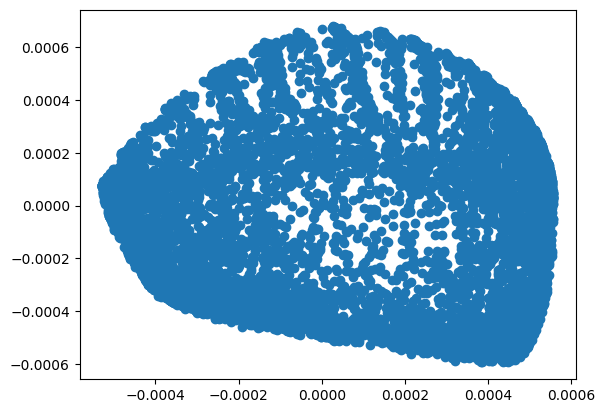

In [97]:
# implmenet spectral embedding with 2 components
embedding = manifold.SpectralEmbedding(n_components=2)
# transform the original data given the embeddings
x_trans = embedding.fit_transform(data_matrix)
x,y = x_trans.T
plt.scatter(x,y);

In [98]:
kmeans = cluster.KMeans(n_clusters=4).fit(x_trans)
labels = kmeans.labels_
labels

/Users/bryan/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 0, ..., 1, 1, 1], dtype=int32)

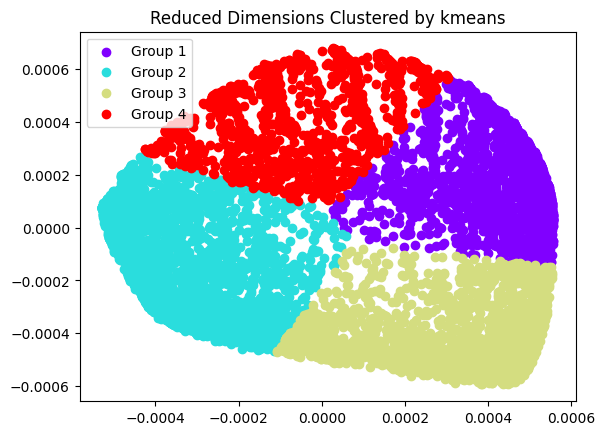

In [99]:
plt.figure()
# define a vector of colors
colors = cm.rainbow(np.linspace(0, 1, 4))
list1 = []
list2 = []
list3 = []
list4 = []
for i in range(len(x_trans)):
    if labels[i] == 0:
        list1.append(x_trans[i])
    elif labels[i] == 1:
        list2.append(x_trans[i])
    elif labels[i] == 2:
        list3.append(x_trans[i])
    elif labels[i] == 3:
        list4.append(x_trans[i])
array1 = np.array(list1).T
array2 = np.array(list2).T
array3 = np.array(list3).T
array4 = np.array(list4).T

# plot each cluster 
plt.scatter(array1[0], array1[1], color=colors[0])
plt.scatter(array2[0], array2[1], color=colors[1])
plt.scatter(array3[0], array3[1], color=colors[2])
plt.scatter(array4[0], array4[1], color=colors[3])


plt.title('Reduced Dimensions Clustered by kmeans')
plt.legend(['Group 1', 'Group 2', 'Group 3', 'Group 4'])

In [100]:
# read in the loan dataset
loan_data = pd.read_csv('loan_cleaned.csv')
data_matrix = loan_data.to_numpy()
true_label = loan_data['Yes'].to_list()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2568 non-null   int64  
 1   ID                        2568 non-null   int64  
 2   Car_Owned                 2568 non-null   float64
 3   Bike_Owned                2568 non-null   float64
 4   Active_Loan               2568 non-null   float64
 5   House_Own                 2568 non-null   float64
 6   Child_Count               2568 non-null   float64
 7   Own_House_Age             2568 non-null   float64
 8   Mobile_Tag                2568 non-null   int64  
 9   Homephone_Tag             2568 non-null   int64  
 10  Workphone_Working         2568 non-null   int64  
 11  Client_Family_Members     2568 non-null   float64
 12  Cleint_City_Rating        2568 non-null   float64
 13  Application_Process_Day   2568 non-null   float64
 14  Applicat

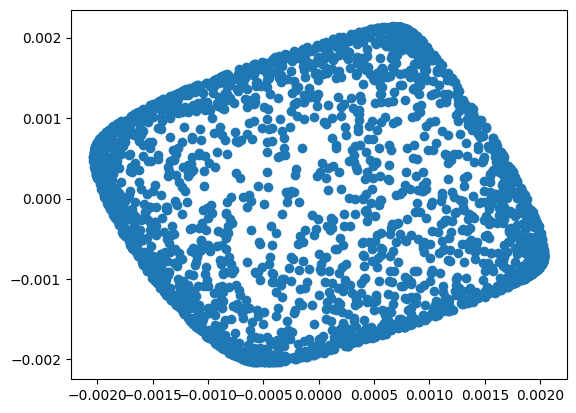

In [101]:
embedding = manifold.SpectralEmbedding(n_components=2)
x_trans = embedding.fit_transform(data_matrix)
x,y = x_trans.T
plt.scatter(x,y);

In [102]:
kmeans = cluster.KMeans(n_clusters=2).fit(x_trans)
labels = kmeans.labels_
labels

/Users/bryan/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

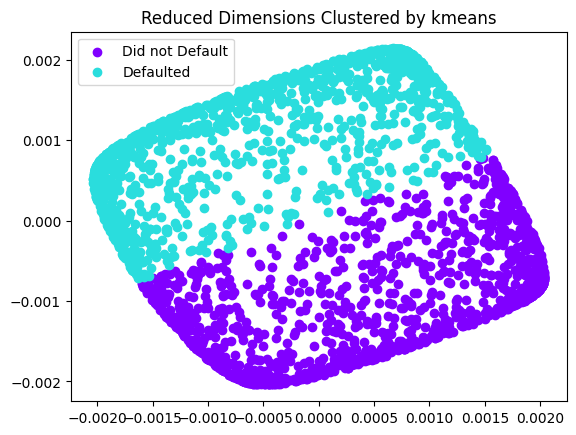

In [103]:
plt.figure()
colors = cm.rainbow(np.linspace(0, 1, 4))
list1 = []
list2 = []
for i in range(len(x_trans)):
    if labels[i] == 0:
        list1.append(x_trans[i])
    elif labels[i] == 1:
        list2.append(x_trans[i])
array1 = np.array(list1).T
array2 = np.array(list2).T

plt.scatter(array1[0], array1[1], color=colors[0])
plt.scatter(array2[0], array2[1], color=colors[1])



plt.title('Reduced Dimensions Clustered by kmeans')
plt.legend(['Did not Default', 'Defaulted'])

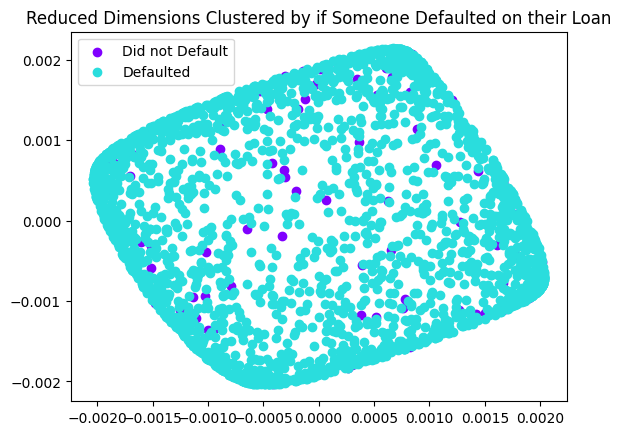

In [104]:
plt.figure()
colors = cm.rainbow(np.linspace(0, 1, 4))
list1 = []
list2 = []
for i in range(len(x_trans)):
    if true_label[i] == 0:
        list1.append(x_trans[i])
    elif true_label[i] == 1:
        list2.append(x_trans[i])
array1 = np.array(list1).T
array2 = np.array(list2).T

plt.scatter(array1[0], array1[1], color=colors[0])
plt.scatter(array2[0], array2[1], color=colors[1])

plt.title('Reduced Dimensions Clustered by if Someone Defaulted on their Loan')
plt.legend(['Did not Default','Defaulted'])